# 第2章 感知机

## 一、感知机模型

$$
f(x)=sign(w \cdot x+b)
$$

其中

$$
sign(x)=\begin{cases}
+1,& \text{$x \geqslant 0$}\\
-1,& \text{$x < 0$}
\end{cases}
$$

感知机是一种线性分类模型，属于判别模型。感知机模型的假设空间是定义在特征空间中的所有线性分类模型或线性分类器，即函数集合 $\{f|f(x)=w \cdot x + b\}$\

一个感知机对应一个分离超平面 $w \cdot x + b = 0$

## 二、感知机学习策略

损失函数为误分类点到超平面的总距离，并最小化损失函数

$$
L(w, b) = -\sum_{x_{i} \in M} y_{i}(w \cdot x_{i} + b)
$$

其中 M 为当前感知机模型下的误分类点集合

## 三、感知机学习算法

最优化的方法是随机梯度下降法

### 1、原始形式

求解
$$
\min_{w,b}L(w,b) = -\sum_{x_{i} \in M}y_{i}(w \cdot x_{i} + b)
$$

梯度下降时一次随机选取一个误分类点进行梯度下降，那么损失函数$L(w,b)$的梯度为

$$
\nabla_{w}L(w,b) = -\sum_{x_{i} \in M}y_{i}x_{i}
$$
$$
\nabla_{b}L(w,b) = -\sum_{x_{i} \in M}y_{i}
$$

对 $w,b$ 进行更新，其中 $\eta$ $(0 < \eta \le 1)$ 为学习率：
$$
w \leftarrow w + \eta y_{i}x_{i}
$$

$$
b \leftarrow b + \eta y_{i}
$$

**原始形式的感知机学习算法**

输入：训练数据集 $T = \{(x_{1}, y_{1}),(x_{1}, y_{2}), \ldots ,(x_{N}, y_{N})\}$；学习率 $\eta$

输出：$w,b$；感知机模型 $f(x) = sign(w \cdot x + b)$

（1）选取初值 $w_{0}, b_{0}$

（2）在训练集中选取数据 $(x_{i}, y_{i})$

（3）如果 $y_{i}(w \cdot x + b) \le 0$
$$
w \leftarrow w + \eta y_{i}x_{i}
$$
$$
b \leftarrow b + \eta y_{i}
$$

（4）转至（2），直至训练集中没有误分类点

## 准备阶段

加载库、导入数据

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = load_iris()

In [3]:
iris_df = pd.DataFrame(data.data, columns=data.feature_names)
iris_df['label'] = data.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris_df.to_csv('data/iris.csv')

## 简单检查原始数据

In [5]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

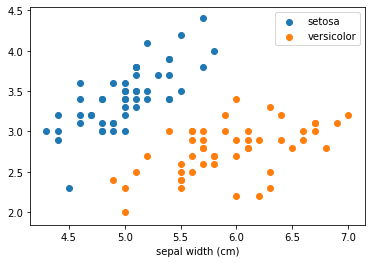

In [6]:
sepal_features = ['sepal length (cm)','sepal width (cm)']
setosa = iris_df[iris_df.label == 0][sepal_features]
versicolor = iris_df[iris_df.label == 1][sepal_features]

plt.scatter(setosa.values[:,0], setosa.values[:,1], label='setosa')
plt.scatter(versicolor.values[:,0], versicolor.values[:,1], label='versicolor')
plt.xlabel(sepal_features[0])
plt.xlabel(sepal_features[1])
plt.legend()

## 准备算法模型

In [7]:
class Model():
    def __init__(self):
        self.learning_rate = 0.01

    def fit(self, X, y):
        self.w = np.random.rand(len(X[0]))
        self.b = 0
        while True:
            update_count = 0
            for i in range(len(X)):
                if (y[i] * (np.dot(self.w, X[i]) + self.b)) <= 0:
                    self.w += self.learning_rate * y[i] * X[i]
                    self.b += self.learning_rate * y[i]
                    update_count += 1
            if update_count == 0:
                break
        print("Finished.")
        print("w: {}, b: {}".format(self.w, self.b))
    
    def params(self):
        return (self.w, self.b)

## 准备训练数据

In [8]:
features = ['sepal length (cm)','sepal width (cm)']
X_train = iris_df[iris_df.label.isin([0,1])][features].values
y_train = iris_df[iris_df.label.isin([0,1])]['label'].values
y_train[y_train == 0] = -1

## 开始训练

In [9]:
model = Model()
model.fit(X_train, y_train)

Finished.
w: [ 0.79099099 -1.00437731], b: -1.2500000000000009


## 画图检验

In [10]:
w, b = model.params()

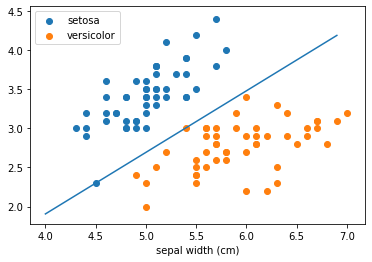

In [11]:
sepal_features = ['sepal length (cm)','sepal width (cm)']
setosa = iris_df[iris_df.label == 0][sepal_features]
versicolor = iris_df[iris_df.label == 1][sepal_features]

x0 = np.arange(4, 7, 0.1)
x1 = - (w[0]*x0 + b) / w[1]
plt.plot(x0, x1)

plt.scatter(setosa.values[:,0], setosa.values[:,1], label='setosa')
plt.scatter(versicolor.values[:,0], versicolor.values[:,1], label='versicolor')
plt.xlabel(sepal_features[0])
plt.xlabel(sepal_features[1])
plt.legend()